<a href="https://colab.research.google.com/github/amrithabaratam/project/blob/main/ClassificationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()  # Manually upload the ZIP file


Saving damaged.zip to damaged.zip


In [ ]:
from google.colab import files

uploaded = files.upload()  # Manually upload the ZIP file


Saving good.zip to good.zip


In [ ]:
import zipfile
import os

# Define ZIP file name (change if needed)
zip_file = "damag.zip"

# Extract to a directory
extract_path = "/content/dataset/damaged"
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted files
print("Extracted files:", os.listdir(extract_path))

Extracted files: ['damaged-spines-old-books-on-600nw-2550311477.jpg', 'documents.jpg', 'tumblr_ob31hvOf6b1rzuswqo1_1280-1024x768.jpg', 'images77.jpg', 'BeDazzled-Wimpy-Kid-scaled-1.jpg', 'damaged-old-book-with-burnt-pages-forming-heart-shape-laying-on-stone-surface-photo.jpg', 'images42.jpg', 'file1411293850766.jpg', 'Book-damaged-beyond-repair.jpg', 'images51.jpg', 'images63.jpg', 'maxresdefault.jpg', 'images48.jpg', 'open-antique-book-showing-damaged-pages-with-leather-binding-photo.jpg', 'images52.jpg', 'man-holds-several-old-damaged-260nw-144655742.jpg', 'images65.jpg', 'old-damaged-book-DW1MCY.jpg', '20463808-old-damaged-books.jpg', 'images58.jpg', 'images56.jpg', 'water-logged-book-1.jpg', 'gnawmg6taoza1.jpg', 'images41.jpg', '1200px-Damaged_book_28Bandos29_detail.png', 'img-26.jpg', 'images59.jpg', 'images66.jpg', 'pngtree-an-old-book-with-a-crumpled-sheet-dirty-photo-png-image_13486722.png', 'flood_damaged_book_right.jpg', '916JyApFSXL._UF10001000_QL80_.jpg', '645ea487ef174bbfe

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir='dataset'

In [ ]:
image_exts=['jpeg','jpg','bmp','png']

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))

In [ ]:
tf.data.Dataset??

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data=tf.keras.utils.image_dataset_from_directory('dataset')

Found 84 files belonging to 1 classes.


In [ ]:
data_iterator=data.as_numpy_iterator()

In [ ]:
batch=data_iterator.next()

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
#0-damaged books
#1-good books
batch[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

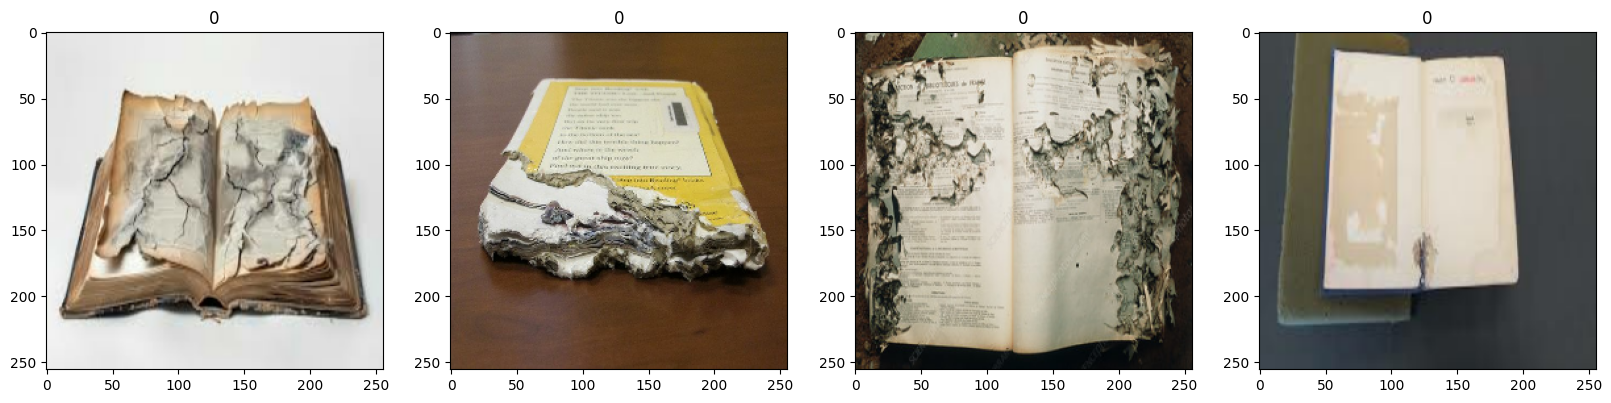

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
scaled=batch[0]/255

In [ ]:
scaled.max()

1.0

In [ ]:
data=data.map(lambda x,y:(x/255,y))

In [ ]:
data.as_numpy_iterator().next()[0].max()


1.0

In [ ]:
len(data)

3

In [ ]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1


In [ ]:
test_size+val_size+train_size

3

In [ ]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [ ]:
len(test)

1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
model=Sequential()

In [ ]:

model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
!mkdir -p /content/logs

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3333 - loss: 0.5697
Epoch 2/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 1.0932e-04
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 2.9634e-05
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 1.0000 - loss: 1.1786e-06
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 1.2552e-07
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 3.6754e-08
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 8s/step - accuracy: 1.0000 - loss: 6.1473e-09
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 1.4042e-09
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 1.0000 - loss: 3.6186e-10
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 3.8913e-11
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 1.1025e-12
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 1.0000 - loss: 8.4065e-13
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 1.0000 - los

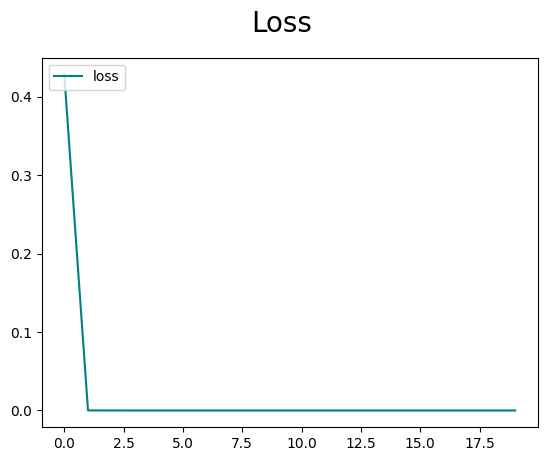

In [ ]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
#plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss' , fontsize=20)
plt.legend(loc='upper left')
plt.show()
#

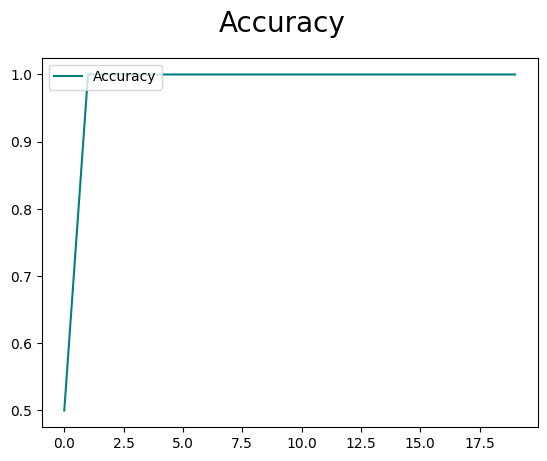

In [ ]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='Accuracy')
#plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy' , fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [ ]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [ ]:
len(test)

1

In [ ]:
for batch in test.as_numpy_iterator():
  X,y=batch
  yhat=model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


In [ ]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:0.0,Recall:0.0,Accuracy:1.0


In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
img=cv2.imread('/test1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [ ]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [ ]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [ ]:
if yhat>0.5:
  print('good')
else:
  print('bad')

NameError: name 'yhat' is not defined

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','modelProject.h5'))

In [ ]:
new_model=load_model(os.path.join('models','modelProject.h5'))

In [ ]:
yhat=new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [ ]:
if yhat>0.5:
  print('good')
else:
  print('bad')

good


In [ ]:
model.save("modelProject.h5")
from google.colab import files
files.download("modelProject.h5")  # Download the model


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle

# Save the trained model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
